# 3. Answer Question

## 3.0. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1. Read data

In [2]:
data_path = './data/tvshows.csv'
df = pd.read_csv(data_path)
df.head()

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Countries of origins,Languages,Production companies,Link
0,Queen Cleopatra,"(2023, None)",TV-14,45.0,1.2,86000,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,"(2023, 2024)",TV-MA,25.0,1.6,80000,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,"(2007, 2021)",TV-14,44.0,2.9,32000,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,"(2019, 2022)",TV-14,45.0,3.6,47000,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,"(2024, None)",TV-14,35.0,4.1,125000,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...


## 3.2. Asking meaningful question

| **No.** | **What is the question?**                                         | **What are benefits of finding the answer?**                                                                 | **How to find the answers of questions by using df**                                                                                   |
|---------|-------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| 1       | **What is the best TV Shows?**                                    | Identifying the best TV shows helps understand what factors contribute to success, like runtime, ratings, etc. | Use [*Min-Max Normalization method*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) for features like runtime, votes, and Emmys to standardize the df and calculate a composite score.          |

### 3.2.1. Question 1: What is the best TVShows?

To determine the "best" TV shows, we need to consider multiple factors that can influence a show's popularity and overall reception. Commonly, metrics such as **Runtime**, **Rating**, **Number of Votes**, and **Awards** (e.g., Emmys) play a significant role in evaluating the success of a TV show. However, these metrics often have different scales. For instance, the **Runtime** of a TV show can range from 30 minutes to several hours, while the **Number of Votes** can vary from a few thousand to millions. Therefore, to make a meaningful comparison across these different metrics, we need to **normalize** the data, so that all values fall within the same range, typically between **0** and **1**.

In this approach, we use the [*Min-Max Normalization method*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) method, which adjusts the values of each variable by rescaling them within a predefined range (usually **0** to **1**). The formula for this method is as follows:

```math
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}


Where:
- **`X`** is the current value,
- **`X_min`** is the minimum value in the dataset,
- **`X_max`** is the maximum value in the dataset,
- **`X_norm`** is the normalized value, scaled between 0 and 1.

This transformation ensures that each metric (such as **Runtime**, **Votes**, and **Emmys**) is adjusted proportionally, allowing for a more balanced comparison. For example, a TV show with a higher number of votes will now be treated on the same scale as a show with a higher runtime.

By applying this normalization process, we can directly compare the various metrics across TV shows, making it easier to evaluate their success and popularity in a consistent and standardized way.

#### Step 1: Normalize the Metrics

We begin by normalizing the **Runtime**, **Number of Votes**, and **Emmys**. Although the **Rating** could also be considered for normalization, in this case, it has been excluded for simplicity. By applying the **Min-Max Normalization** formula to each of these metrics, we create new columns (`Runtime_norm`, `Votes_norm`, `Emmys_norm`) that represent each feature on the same scale.


In [3]:
# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
# df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())

#### Step 2: Define Weights and Calculate the Composite Score

Next, we assign weights to each of these normalized metrics to reflect their relative importance. In this case, we assign equal weights to **Runtime**, **Votes**, and **Emmys**. This means each of these factors will contribute one-third to the overall **Composite Score** of a TV show. The **Rating** could be included in the calculation as well, but it has been excluded for simplicity in this example.

The **Composite Score** for each TV show is calculated by multiplying each normalized metric by its respective weight, and summing the results:

In [4]:
# Define weights for each metric
runtime_weight = 1/3
# rating_weight = 1/4
votes_weight = 1/3
emmys_weight = 1/3

# Calculate Composite Score for each TV show
df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    # df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

#### Step 3: Visualize the Distribution of Composite Scores

Once we calculate the **Composite Score**, we can visualize its distribution across all TV shows. A **histogram** can provide a clear view of how the scores are spread out, helping us to see if there are a few shows with exceptionally high scores or if the scores are distributed more evenly.

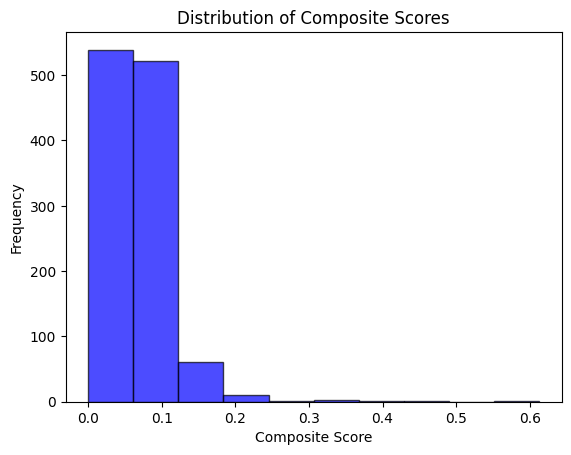

In [5]:
# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()

#### Step 4: Identify the Top TV Shows

Finally, we sort the data by the **Composite Score** and identify the top 10 TV shows. These are the shows that have the highest combined scores across the **Runtime**, **Votes**, and **Emmys**, according to the weights we assigned.

In [6]:
# Get top 10 shows with the highest composite scores
top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Top 10 shows:
                    Title  Composite Score
1126      Game of Thrones         0.612815
617   Saturday Night Live         0.446099
1137         Breaking Bad         0.415751
6                The Idol         0.349193
124                  Dune         0.327066
1049      Stranger Things         0.307551
1115             Sherlock         0.277117
1132            Chernobyl         0.230920
1043         The Simpsons         0.215202
1125         The Sopranos         0.212253


#### Conclusion:

By following these steps, we can identify the best TV shows based on a balanced combination of multiple success metrics. These metrics are normalized to ensure a fair comparison, and by using a weighted **composite score**, we can determine which shows stand out the most in terms of audience engagement and critical recognition.

This approach helps content creators, marketers, and viewers alike to make data-driven decisions about what shows are most successful, based on multiple factors like **runtime**, **viewer votes**, and **award recognition**.